In [34]:
#imports
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
pd.set_option('max_column', None)
import matplotlib.pyplot as plt
import seaborn as sns

## Loading data

In [2]:
data  = pd.read_excel('../data/Week1_challenge_data_source.xlsx', na_values=['?', None])
data.head(5)

Bearer Id               Start  Start ms                 End  \
0  13114483460844900352 2019-04-04 12:01:18     770.0 2019-04-25 14:35:31   
1  13114483482878900224 2019-04-09 13:04:04     235.0 2019-04-25 08:15:48   
2  13114483484080500736 2019-04-09 17:42:11       1.0 2019-04-25 11:58:13   
3  13114483485442799616 2019-04-10 00:31:25     486.0 2019-04-25 07:36:35   
4  13114483499480700928 2019-04-12 20:10:23     565.0 2019-04-25 10:40:32   

   End ms  Dur. (ms)          IMSI  MSISDN/Number          IMEI  \
0   662.0  1823652.0  2.082014e+14   3.366496e+10  3.552121e+13   
1   606.0  1365104.0  2.082019e+14   3.368185e+10  3.579401e+13   
2   652.0  1361762.0  2.082003e+14   3.376063e+10  3.528151e+13   
3   171.0  1321509.0  2.082014e+14   3.375034e+10  3.535661e+13   
4   954.0  1089009.0  2.082014e+14   3.369980e+10  3.540701e+13   

  Last Location Name  Avg RTT DL (ms)  Avg RTT UL (ms)  \
0   9164566995485190             42.0              5.0   
1            L77566A             65.0              5.0   
2            D42335A              NaN              NaN   
3            T21824A              NaN              NaN   
4            D88865A              NaN              NaN   

   Avg Bearer TP DL (kbps)  Avg Bearer TP UL (kbps)  \
0                     23.0                     44.0   
1                     16.0                     26.0   
2                      6.0                      9.0   
3                     44.0                     44.0   
4                      6.0                      9.0   

   TCP DL Retrans. Vol (Bytes)  TCP UL Retrans. Vol (Bytes)  \
0                          NaN                          NaN   
1                          NaN                          NaN   
2                          NaN                          NaN   
3                          NaN                          NaN   
4                          NaN                          NaN   

   DL TP < 50 Kbps (%)  50 Kbps < DL TP < 250 Kbps (%)  \
0                100.0                             0.0   
1                100.0                             0.0   
2                100.0                             0.0   
3                100.0                             0.0   
4                100.0                             0.0   

   250 Kbps < DL TP < 1 Mbps (%)  DL TP > 1 Mbps (%)  UL TP < 10 Kbps (%)  \
0                            0.0                 0.0                100.0   
1                            0.0                 0.0                100.0   
2                            0.0                 0.0                100.0   
3                            0.0                 0.0                100.0   
4                            0.0                 0.0                100.0   

   10 Kbps < UL TP < 50 Kbps (%)  50 Kbps < UL TP < 300 Kbps (%)  \
0                            0.0                             0.0   
1                            0.0                             0.0   
2                            0.0                             0.0   
3                            0.0                             0.0   
4                            0.0                             0.0   

   UL TP > 300 Kbps (%)  HTTP DL (Bytes)  HTTP UL (Bytes)  \
0                   0.0              NaN              NaN   
1                   0.0              NaN              NaN   
2                   0.0              NaN              NaN   
3                   0.0              NaN              NaN   
4                   0.0              NaN              NaN   

   Activity Duration DL (ms)  Activity Duration UL (ms)   Dur. (ms).1  \
0                    37624.0                    38787.0  1.823653e+09   
1                      168.0                     3560.0  1.365104e+09   
2                        0.0                        0.0  1.361763e+09   
3                     3330.0                    37882.0  1.321510e+09   
4                        0.0                        0.0  1.089009e+09   

  Handset Manufacturer                 Handset Type  \
0      

In [3]:
# column names
list(data.columns)

['Bearer Id',
 'Start',
 'Start ms',
 'End',
 'End ms',
 'Dur. (ms)',
 'IMSI',
 'MSISDN/Number',
 'IMEI',
 'Last Location Name',
 'Avg RTT DL (ms)',
 'Avg RTT UL (ms)',
 'Avg Bearer TP DL (kbps)',
 'Avg Bearer TP UL (kbps)',
 'TCP DL Retrans. Vol (Bytes)',
 'TCP UL Retrans. Vol (Bytes)',
 'DL TP < 50 Kbps (%)',
 '50 Kbps < DL TP < 250 Kbps (%)',
 '250 Kbps < DL TP < 1 Mbps (%)',
 'DL TP > 1 Mbps (%)',
 'UL TP < 10 Kbps (%)',
 '10 Kbps < UL TP < 50 Kbps (%)',
 '50 Kbps < UL TP < 300 Kbps (%)',
 'UL TP > 300 Kbps (%)',
 'HTTP DL (Bytes)',
 'HTTP UL (Bytes)',
 'Activity Duration DL (ms)',
 'Activity Duration UL (ms)',
 'Dur. (ms).1',
 'Handset Manufacturer',
 'Handset Type',
 'Nb of sec with 125000B < Vol DL',
 'Nb of sec with 1250B < Vol UL < 6250B',
 'Nb of sec with 31250B < Vol DL < 125000B',
 'Nb of sec with 37500B < Vol UL',
 'Nb of sec with 6250B < Vol DL < 31250B',
 'Nb of sec with 6250B < Vol UL < 37500B',
 'Nb of sec with Vol DL < 6250B',
 'Nb of sec with Vol UL < 1250B',
 'Socia

In [4]:
# number of data points
print(f" There are {data.shape[0]} rows and {data.shape[1]} columns")

 There are 150001 rows and 55 columns


## Handling Missing Values

In [5]:
# how many missing values exist or better still what is the % of missing values in the dataset?
def percent_missing(df):

    # Calculate total number of cells in dataframe
    totalCells = np.product(df.shape)

    # Count number of missing values per column
    missingCount = df.isnull().sum()

    # Calculate total number of missing values
    totalMissing = missingCount.sum()

    # Calculate percentage of missing values
    print("The dataset contains", round(((totalMissing/totalCells) * 100), 2), "%", "missing values.")

percent_missing(data)

The dataset contains 12.49 % missing values.


In [6]:
# Which column(s) has missing values
data.isna().sum()

Bearer Id                                        0
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

In [7]:
# fill missing with ffill method for columns (diag_1, diag_2, diag_3)
def fix_missing_ffill(df, col):
    df[col] = df[col].fillna(method='ffill')
    return df[col]

def fix_missing_bfill(df, col):
    df[col] = df[col].fillna(method='bfill')
    return df[col]

data['Bearer Id'] = fix_missing_ffill(data, 'Bearer Id')
data['MSISDN/Number'] = fix_missing_ffill(data, 'MSISDN/Number')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   Bearer Id                                 150001 non-null  object        
 1   Start                                     150000 non-null  datetime64[ns]
 2   Start ms                                  150000 non-null  float64       
 3   End                                       150000 non-null  datetime64[ns]
 4   End ms                                    150000 non-null  float64       
 5   Dur. (ms)                                 150000 non-null  float64       
 6   IMSI                                      149431 non-null  float64       
 7   MSISDN/Number                             150001 non-null  float64       
 8   IMEI                                      149429 non-null  float64       
 9   Last Location N

In [9]:
data["Start"], data["End"] = pd.to_datetime(data["Start"], format='%m/%d/%Y %H:%M', errors='coerce'),\
    pd.to_datetime(data["End"], format='%m/%d/%Y %H:%M', errors='coerce')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   Bearer Id                                 150001 non-null  object        
 1   Start                                     150000 non-null  datetime64[ns]
 2   Start ms                                  150000 non-null  float64       
 3   End                                       150000 non-null  datetime64[ns]
 4   End ms                                    150000 non-null  float64       
 5   Dur. (ms)                                 150000 non-null  float64       
 6   IMSI                                      149431 non-null  float64       
 7   MSISDN/Number                             150001 non-null  float64       
 8   IMEI                                      149429 non-null  float64       
 9   Last Location N

In [11]:
# The top 10 handsets used by the customers
top10_handsets_customers = data[['Handset Type','IMSI']].groupby(['Handset Type'])
#top10 = data.sort_values(['Handset Type','IMSI'], ascending=False).groupby('Handset Type')
top10_handsets_customers = top10_handsets_customers['IMSI'].nunique()
top10_handsets_customers = top10_handsets_customers.reset_index(name='Total')
top10_handsets_customers = top10_handsets_customers.sort_values(['Total'], ascending=False)
top10_handsets_customers.head(10)

Handset Type  Total
316               Huawei B528S-23A  10638
53         Apple iPhone 6S (A1688)   6765
1395                     undefined   6716
49          Apple iPhone 6 (A1586)   6271
59          Apple iPhone 7 (A1778)   4721
73         Apple iPhone Se (A1723)   3764
66          Apple iPhone 8 (A1905)   3550
955   Samsung Galaxy S8 (Sm-G950F)   3275
78         Apple iPhone Xr (A2105)   3077
888    Samsung Galaxy J5 (Sm-J530)   2760

In [12]:
# top 3 handset manufacturers
top3_handset_manufacturers = data[['Handset Manufacturer','IMSI']].groupby(['Handset Manufacturer'])
top3_handset_manufacturers = top3_handset_manufacturers['IMSI'].nunique().nlargest(3).reset_index()
top3_handset_manufacturers

Handset Manufacturer   IMSI
0                Apple  42684
1              Samsung  30980
2               Huawei  21742

In [13]:
#top 5 handsets per top 3 handset manufacturer

In [14]:
# top 5 handset manfacturer for Apple
Apple_handsets = data[data['Handset Manufacturer']=='Apple']
Apple_handsets = Apple_handsets.groupby(['Handset Type'])['IMSI']
Apple_handsets = Apple_handsets.nunique().nlargest(5).reset_index()
Apple_handsets

Handset Type  IMSI
0  Apple iPhone 6S (A1688)  6765
1   Apple iPhone 6 (A1586)  6271
2   Apple iPhone 7 (A1778)  4721
3  Apple iPhone Se (A1723)  3764
4   Apple iPhone 8 (A1905)  3550

In [15]:
#top 5 handset manfacturer for Huawei
Huawei_handsets = data[data['Handset Manufacturer']=='Huawei']
Huawei_handsets = Huawei_handsets.groupby(['Handset Type'])['IMSI']
Huawei_handsets = Huawei_handsets.nunique().nlargest(5).reset_index()
Huawei_handsets

Handset Type   IMSI
0                Huawei B528S-23A  10638
1  Huawei P20 Lite Huawei Nova 3E   1534
2                    Huawei E5180   1185
3                      Huawei P20   1110
4                  Huawei Y6 2018    757

In [16]:
#top 5 handset manfacturer for Samsung
Samsung_handset = data[data['Handset Manufacturer']=='Samsung']
Samsung_handset = Samsung_handset.groupby(['Handset Type'])['IMSI']
Samsung_handset = Samsung_handset.nunique().nlargest(5).reset_index()
Samsung_handset

Handset Type  IMSI
0  Samsung Galaxy S8 (Sm-G950F)  3275
1   Samsung Galaxy J5 (Sm-J530)  2760
2    Samsung Galaxy A5 Sm-A520F  2721
3   Samsung Galaxy J3 (Sm-J330)  2606
4  Samsung Galaxy S7 (Sm-G930X)  2310

##### Task 1.1 - Your employer wants to have an overview of the users’ behavior on those
applications.

Aggregate per user the following information in the column
* number of xDR sessions
* Session duration
* the total download (DL) and upload (UL) data
* the total data volume (in Bytes) during this session for each application

In [17]:
#number_of_xDR_sessions = data.groupby(['MSISDN/Number', 'Bearer Id']).groups
number_of_xDR_sessions = data.groupby(['IMSI'])['Bearer Id'].count()
number_of_xDR_sessions.head(5)

IMSI
2.040471e+14    1
2.040808e+14    1
2.082001e+14    1
2.082001e+14    1
2.082001e+14    2
Name: Bearer Id, dtype: int64

In [18]:
number_of_xDR_sessions.describe()

count    107265.000000
mean          1.393101
std           0.805722
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max          18.000000
Name: Bearer Id, dtype: float64

In [19]:
#Session duration
session_duration = data.groupby(['IMSI'])['Dur. (ms)'].sum()
session_duration.head(5)

IMSI
2.040471e+14    869844.0
2.040808e+14    877385.0
2.082001e+14     86019.0
2.082001e+14     86254.0
2.082001e+14    573923.0
Name: Dur. (ms), dtype: float64

In [20]:
session_duration.describe()

count    1.072650e+05
mean     1.459355e+05
std      1.863518e+05
min      7.142000e+03
25%      7.041100e+04
50%      1.024500e+05
75%      1.727990e+05
max      1.855375e+07
Name: Dur. (ms), dtype: float64

In [21]:
# the total download (DL) and upload (UL) data
total_DL_UL = data.groupby(['IMSI'])['Total UL (Bytes)', 'Total DL (Bytes)'].sum()
total_DL_UL.head(5)

Total UL (Bytes)  Total DL (Bytes)
IMSI                                            
2.040471e+14        60456049.0        78697597.0
2.040808e+14        37295915.0       194828056.0
2.082001e+14        53794658.0        31376981.0
2.082001e+14        33583272.0       392918313.0
2.082001e+14        71325004.0       961767023.0

In [22]:
total_DL_UL.describe()

Total UL (Bytes)  Total DL (Bytes)
count      1.072650e+05      1.072650e+05
mean       5.728499e+07      6.333706e+08
std        3.564266e+07      4.643722e+08
min        2.866892e+06      8.827082e+06
25%        3.639251e+07      3.148031e+08
50%        4.678050e+07      5.700628e+08
75%        6.565842e+07      8.070673e+08
max        7.295774e+08      8.156743e+09

In [23]:
# the total data volume (in Bytes) during this session for each application
total_data_volume = data[['IMSI', 'Dur. (ms)' ,'Total UL (Bytes)', 'Total DL (Bytes)', 'Social Media DL (Bytes)',
                        'Social Media UL (Bytes)', 'Google DL (Bytes)', 'Google UL (Bytes)', 
                        'Email DL (Bytes)', 'Email UL (Bytes)', 'Youtube DL (Bytes)', 'Youtube UL (Bytes)', 
                        'Netflix DL (Bytes)', 'Netflix UL (Bytes)', 'Gaming DL (Bytes)', 'Gaming UL (Bytes)', 
                        'Other DL (Bytes)', 'Other UL (Bytes)']].groupby(['IMSI']).sum()
total_data_volume.head(5)

Dur. (ms)  Total UL (Bytes)  Total DL (Bytes)  \
IMSI                                                          
2.040471e+14   869844.0        60456049.0        78697597.0   
2.040808e+14   877385.0        37295915.0       194828056.0   
2.082001e+14    86019.0        53794658.0        31376981.0   
2.082001e+14    86254.0        33583272.0       392918313.0   
2.082001e+14   573923.0        71325004.0       961767023.0   

              Social Media DL (Bytes)  Social Media UL (Bytes)  \
IMSI                                                             
2.040471e+14                1500145.0                  45943.0   
2.040808e+14                 668596.0                  46628.0   
2.082001e+14                3073697.0                  49084.0   
2.082001e+14                2542767.0                  34337.0   
2.082001e+14                3326811.0                  99905.0   

              Google DL (Bytes)  Google UL (Bytes)  Email DL (Bytes)  \
IMSI                                                                   
2.040471e+14          5985089.0          3233558.0         2518425.0   
2.040808e+14          8572779.0          1865881.0          842279.0   
2.082001e+14           603691.0          1020971.0         3076735.0   
2.082001e+14         10699827.0          3111651.0         3248863.0   
2.082001e+14          9118088.0          2547799.0         4225757.0   

              Email UL (Bytes)  Youtube DL (Bytes)  Youtube UL (Bytes)  \
IMSI                                                                     
2.040471e+14          812549.0          18980320.0          21960390.0   
2.040808e+14          678492.0           9839889.0           2120016.0   
2.082001e+14          580766.0           5556563.0          14325876.0   
2.082001e+14          606871.0          22414714.0           3242918.0   
2.082001e+14         1338705.0           4046597.0           9793604.0   

              Netflix DL (Bytes)  Netflix UL (Bytes)  Gaming DL (Bytes)  \
IMSI                                                                      
2.040471e+14          21621336.0           7224894.0         28092282.0   
2.040808e+14          10340908.0          16251392.0        164563605.0   
2.082001e+14          15305361.0          16525201.0          3760934.0   
2.082001e+14          10065639.0          17720213.0        343946503.0   
2.082001e+14          30748449.0          26594966.0        910301321.0   

              Gaming UL (Bytes)  Other DL (Bytes)  Other UL (Bytes)  
IMSI                                                                 
2.040471e+14         14977978.0      3.891597e+08        12200737.0  
2.040808e+14         13485133.0      4.676781e+08         2848373.0  
2.082001e+14          5363582.0      5.000445e+08        15929178.0  
2.082001e+14           159394.0      3.009029e+08         8707888.0  
2.082001e+14          7383445.0      1.055869e+09        23566580.0

In [24]:
data = total_data_volume

## Exploratory Data Analysis

In [25]:
percent_missing(data)

The dataset contains 0.0 % missing values.


In [26]:
data.fillna(data.mean(), inplace = True) #  fill nann column with mode 

In [27]:
data.head()

Dur. (ms)  Total UL (Bytes)  Total DL (Bytes)  \
IMSI                                                          
2.040471e+14   869844.0        60456049.0        78697597.0   
2.040808e+14   877385.0        37295915.0       194828056.0   
2.082001e+14    86019.0        53794658.0        31376981.0   
2.082001e+14    86254.0        33583272.0       392918313.0   
2.082001e+14   573923.0        71325004.0       961767023.0   

              Social Media DL (Bytes)  Social Media UL (Bytes)  \
IMSI                                                             
2.040471e+14                1500145.0                  45943.0   
2.040808e+14                 668596.0                  46628.0   
2.082001e+14                3073697.0                  49084.0   
2.082001e+14                2542767.0                  34337.0   
2.082001e+14                3326811.0                  99905.0   

              Google DL (Bytes)  Google UL (Bytes)  Email DL (Bytes)  \
IMSI                                                                   
2.040471e+14          5985089.0          3233558.0         2518425.0   
2.040808e+14          8572779.0          1865881.0          842279.0   
2.082001e+14           603691.0          1020971.0         3076735.0   
2.082001e+14         10699827.0          3111651.0         3248863.0   
2.082001e+14          9118088.0          2547799.0         4225757.0   

              Email UL (Bytes)  Youtube DL (Bytes)  Youtube UL (Bytes)  \
IMSI                                                                     
2.040471e+14          812549.0          18980320.0          21960390.0   
2.040808e+14          678492.0           9839889.0           2120016.0   
2.082001e+14          580766.0           5556563.0          14325876.0   
2.082001e+14          606871.0          22414714.0           3242918.0   
2.082001e+14         1338705.0           4046597.0           9793604.0   

              Netflix DL (Bytes)  Netflix UL (Bytes)  Gaming DL (Bytes)  \
IMSI                                                                      
2.040471e+14          21621336.0           7224894.0         28092282.0   
2.040808e+14          10340908.0          16251392.0        164563605.0   
2.082001e+14          15305361.0          16525201.0          3760934.0   
2.082001e+14          10065639.0          17720213.0        343946503.0   
2.082001e+14          30748449.0          26594966.0        910301321.0   

              Gaming UL (Bytes)  Other DL (Bytes)  Other UL (Bytes)  
IMSI                                                                 
2.040471e+14         14977978.0      3.891597e+08        12200737.0  
2.040808e+14         13485133.0      4.676781e+08         2848373.0  
2.082001e+14          5363582.0      5.000445e+08        15929178.0  
2.082001e+14           159394.0      3.009029e+08         8707888.0  
2.082001e+14          7383445.0      1.055869e+09        23566580.0

In [28]:
data.isna().sum()

Dur. (ms)                  0
Total UL (Bytes)           0
Total DL (Bytes)           0
Social Media DL (Bytes)    0
Social Media UL (Bytes)    0
Google DL (Bytes)          0
Google UL (Bytes)          0
Email DL (Bytes)           0
Email UL (Bytes)           0
Youtube DL (Bytes)         0
Youtube UL (Bytes)         0
Netflix DL (Bytes)         0
Netflix UL (Bytes)         0
Gaming DL (Bytes)          0
Gaming UL (Bytes)          0
Other DL (Bytes)           0
Other UL (Bytes)           0
dtype: int64

In [29]:
# fix outliers
def format_float(value):
    return f'{value:,.2f}'

def convert_bytes_to_megabytes(df, bytes_data):
    megabyte = 1*10e+5
    df[bytes_data] = df[bytes_data] / megabyte
    return df[bytes_data]

def fix_outlier(df, column_list):
    for column in column_list:
        df[column] = np.where(df[column] > df[column].quantile(0.95), df[column].mean(),df[column])
    
    return df

pd.options.display.float_format = format_float

In [30]:
data = fix_outlier(data, list(data.columns))

In [31]:
data.describe()

Dur. (ms)  Total UL (Bytes)  Total DL (Bytes)  Social Media DL (Bytes)  \
count 107,265.00        107,265.00        107,265.00               107,265.00   
mean  121,582.41     51,634,309.54    565,041,386.53             2,227,148.46   
std    77,036.08     22,019,864.52    318,714,751.51             1,316,852.36   
min     7,142.00      2,866,892.00      8,827,082.00                    12.00   
25%    70,411.00     36,392,513.00    314,803,069.00             1,174,932.00   
50%   102,450.00     46,780,498.00    570,062,811.00             2,264,261.00   
75%   163,420.00     58,938,778.00    760,724,396.00             3,073,275.00   
max   369,530.00    124,399,389.00  1,494,615,649.00             5,997,905.00   

       Social Media UL (Bytes)  Google DL (Bytes)  Google UL (Bytes)  \
count               107,265.00         107,265.00         107,265.00   
mean                 40,828.36       7,127,168.65       2,548,079.96   
std                  24,218.69       4,200,988.33       1,508,221.58   
min                       0.00             207.00               3.00   
25%                  21,596.00       3,799,005.00       1,340,855.00   
50%                  41,537.00       7,253,591.00       2,592,477.00   
75%                  56,323.00       9,816,406.00       3,518,740.00   
max                 110,618.00      19,260,532.00       6,882,184.00   

       Email DL (Bytes)  Email UL (Bytes)  Youtube DL (Bytes)  \
count        107,265.00        107,265.00          107,265.00   
mean       2,218,576.32        578,929.63       14,408,332.13   
std        1,309,505.42        343,007.97        8,536,449.90   
min               97.00             14.00               53.00   
25%        1,183,359.00        306,512.00        7,641,030.00   
50%        2,264,497.00        586,867.00       14,595,242.00   
75%        3,053,312.00        800,228.00       19,888,068.00   
max        6,001,541.00      1,566,750.00       38,977,592.00   

       Youtube UL (Bytes)  Netflix DL (Bytes)  Netflix UL (Bytes)  \
count          107,265.00          107,265.00          107,265.00   
mean        13,647,024.32       14,395,834.53       13,638,711.24   
std          8,046,197.32        8,541,023.07        8,084,885.98   
min                106.00               42.00               35.00   
25%          7,243,533.00        7,585,021.00        7,204,045.00   
50%         13,865,169.00       14,630,597.00       13,874,520.00   
75%         18,797,871.00       19,877,023.00       18,792,468.00   
max         36,807,094.00       38,903,688.00       36,811,296.00   

       Gaming DL (Bytes)  Gaming UL (Bytes)  Other DL (Bytes)  \
count         107,265.00         107,265.00        107,265.00   
mean      523,330,094.47      10,279,503.85    521,950,716.29   
std       308,661,522.42       6,085,759.12    309,216,487.04   
min             2,516.00              59.00          3,290.00   
25%       279,237,002.00       5,443,850.00    276,658,777.00   
50%       532,202,932.00      10,441,812.00    529,661,032.00   
75%       720,605,799.00      14,193,775.00    718,507,438.00   
max     1,409,448,526.00      27,759,735.00  1,412,460,014.00   

       Other UL (Bytes)  
count        107,265.00  
mean      10,240,658.99  
std        6,043,759.30  
min              156.00  
25%        5,459,190.00  
50%       10,373,834.00  
75%       14,115,144.00  
max       27,613,377.00

In [32]:
len(list(data.columns))

17

In [33]:
#Plotting functions
def plot_hist(df:pd.DataFrame, column:str, color:str)->None:
    # plt.figure(figsize=(15, 10))
    # fig, ax = plt.subplots(1, figsize=(12, 7))
    sns.displot(data=df, x=column, color=color, kde=True, height=7, aspect=2)
    plt.title(f'Distribution of {column}', size=20, fontweight='bold')
    plt.show()

def plot_count(df:pd.DataFrame, column:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.countplot(data=df, x=column)
    plt.title(f'Distribution of {column}', size=20, fontweight='bold')
    plt.show()
    
def plot_bar(df:pd.DataFrame, x_col:str, y_col:str, title:str, xlabel:str, ylabel:str)->None:
    plt.figure(figsize=(12, 7))
    sns.barplot(data = df, x=x_col, y=y_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.yticks( fontsize=14)
    plt.xlabel(xlabel, fontsize=16)
    plt.ylabel(ylabel, fontsize=16)
    plt.show()

def plot_heatmap(df:pd.DataFrame, title:str, cbar=False)->None:
    plt.figure(figsize=(12, 7))
    sns.heatmap(df, annot=True, cmap='viridis', vmin=0, vmax=1, fmt='.2f', linewidths=.7, cbar=cbar )
    plt.title(title, size=18, fontweight='bold')
    plt.show()

def plot_box(df:pd.DataFrame, x_col:str, title:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.boxplot(data = df, x=x_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.show()

def plot_box_multi(df:pd.DataFrame, x_col:str, y_col:str, title:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.boxplot(data = df, x=x_col, y=y_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.yticks( fontsize=14)
    plt.show()

def plot_scatter(df: pd.DataFrame, x_col: str, y_col: str, title: str, hue: str, style: str) -> None:
    plt.figure(figsize=(12, 7))
    sns.scatterplot(data = df, x=x_col, y=y_col, hue=hue, style=style)
    plt.title(title, size=20)
    plt.xticks(fontsize=14)
    plt.yticks( fontsize=14)
    plt.show()

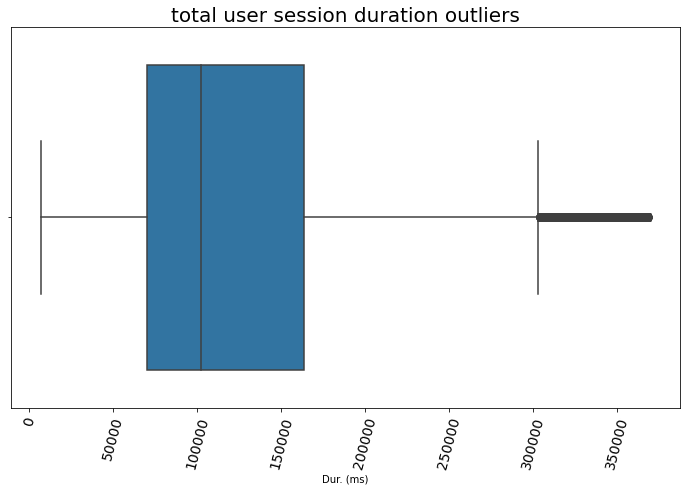

In [35]:
plot_box(data, "Dur. (ms)", "total user session duration outliers")

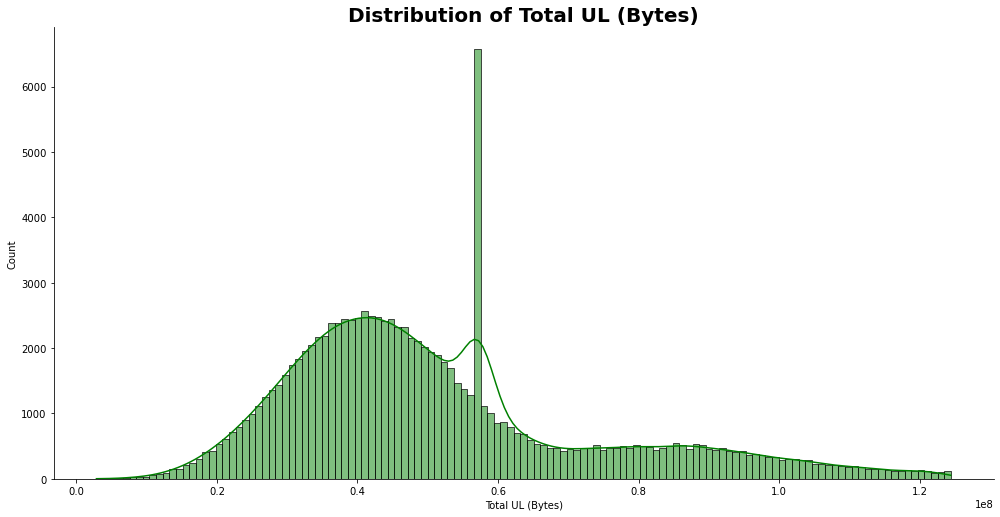

In [36]:
plot_hist(data, "Total UL (Bytes)", "green")

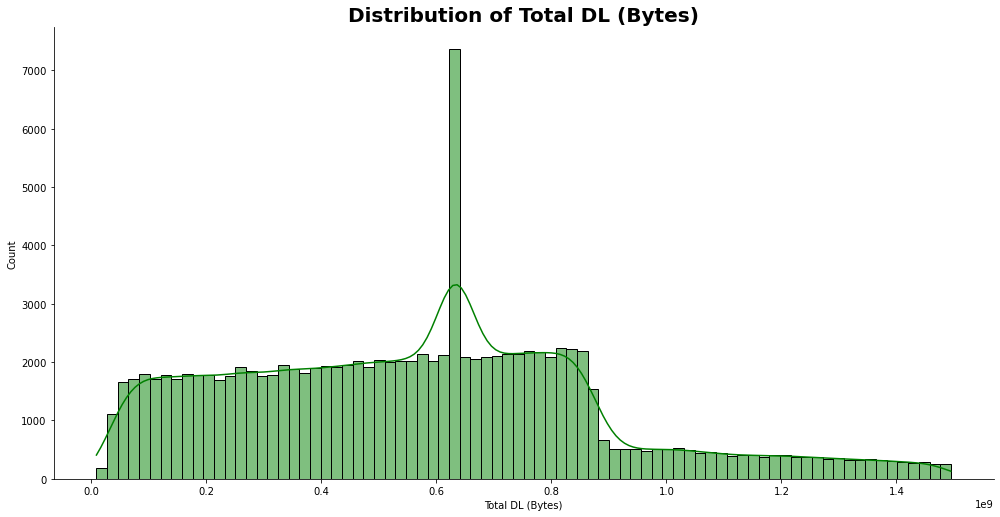

In [37]:
plot_hist(data, "Total DL (Bytes)", "green")

<AxesSubplot:>

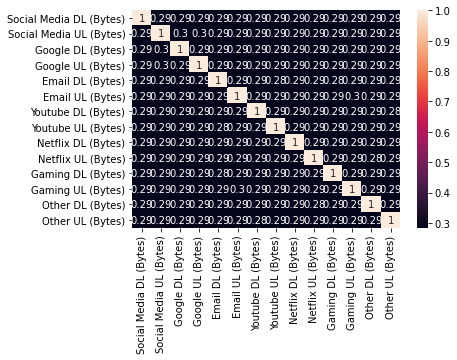

In [52]:
#correlation matrix
cols = ['Social Media DL (Bytes)', 'Social Media UL (Bytes)', 'Google DL (Bytes)', 'Google UL (Bytes)',
            'Email DL (Bytes)', 'Email UL (Bytes)', 'Youtube DL (Bytes)', 'Youtube UL (Bytes)', 
            'Netflix DL (Bytes)', 'Netflix UL (Bytes)', 'Gaming DL (Bytes)', 'Gaming UL (Bytes)',
            'Other DL (Bytes)', 'Other UL (Bytes)']
data_corr = data[cols]
sns.heatmap(data_corr.corr(), annot = True, square=False)

In [53]:
#Multivariate analysis
def total_data_per_app(df):
    cols = ['Social Media DL (Bytes)', 'Social Media UL (Bytes)', 'Google DL (Bytes)', 'Google UL (Bytes)',
            'Email DL (Bytes)', 'Email UL (Bytes)', 'Youtube DL (Bytes)', 'Youtube UL (Bytes)', 
            'Netflix DL (Bytes)', 'Netflix UL (Bytes)', 'Gaming DL (Bytes)', 'Gaming UL (Bytes)',
            'Other DL (Bytes)', 'Other UL (Bytes)']
    df['Social Media'] = df[cols[0]] + df[cols[1]]
    df['Google'] = df[cols[2]] + df[cols[3]]
    df['Email'] = df[cols[4]] + df[cols[5]]
    df['Youtube'] = df[cols[6]] + df[cols[7]]
    df['Netflix'] = df[cols[8]] + df[cols[9]]
    df['Gaming'] = df[cols[10]] + df[cols[11]]
    df['Other'] = df[cols[12]] + df[cols[13]]
    return df
data = total_data_per_app(data)

In [54]:
appdata = data[['Social Media','Google', 'Email','Youtube','Netflix','Gaming','Other']]
appdata.head(5)

Social Media        Google        Email       Youtube  \
IMSI                                                                            
204,047,108,489,451.00  1,546,088.00  9,218,647.00 3,330,974.00 40,940,710.00   
204,080,810,288,647.00    715,224.00 10,438,660.00 1,520,771.00 11,959,905.00   
208,200,101,016,140.00  3,122,781.00  1,624,662.00 3,657,501.00 19,882,439.00   
208,200,101,127,285.00  2,577,104.00 13,811,478.00 3,855,734.00 25,657,632.00   
208,200,101,148,045.00  3,426,716.00 11,665,887.00 5,564,462.00 13,840,201.00   

                             Netflix         Gaming            Other  
IMSI                                                                  
204,047,108,489,451.00 28,846,230.00  43,070,260.00   401,360,457.00  
204,080,810,288,647.00 26,592,300.00 178,048,738.00   470,526,473.00  
208,200,101,016,140.00 31,830,562.00   9,124,516.00   515,973,704.00  
208,200,101,127,285.00 27,785,852.00 344,105,897.00   309,610,741.00  
208,200,101,148,045.00 57,343,415.00 917,684,766.00 1,079,435,419.00

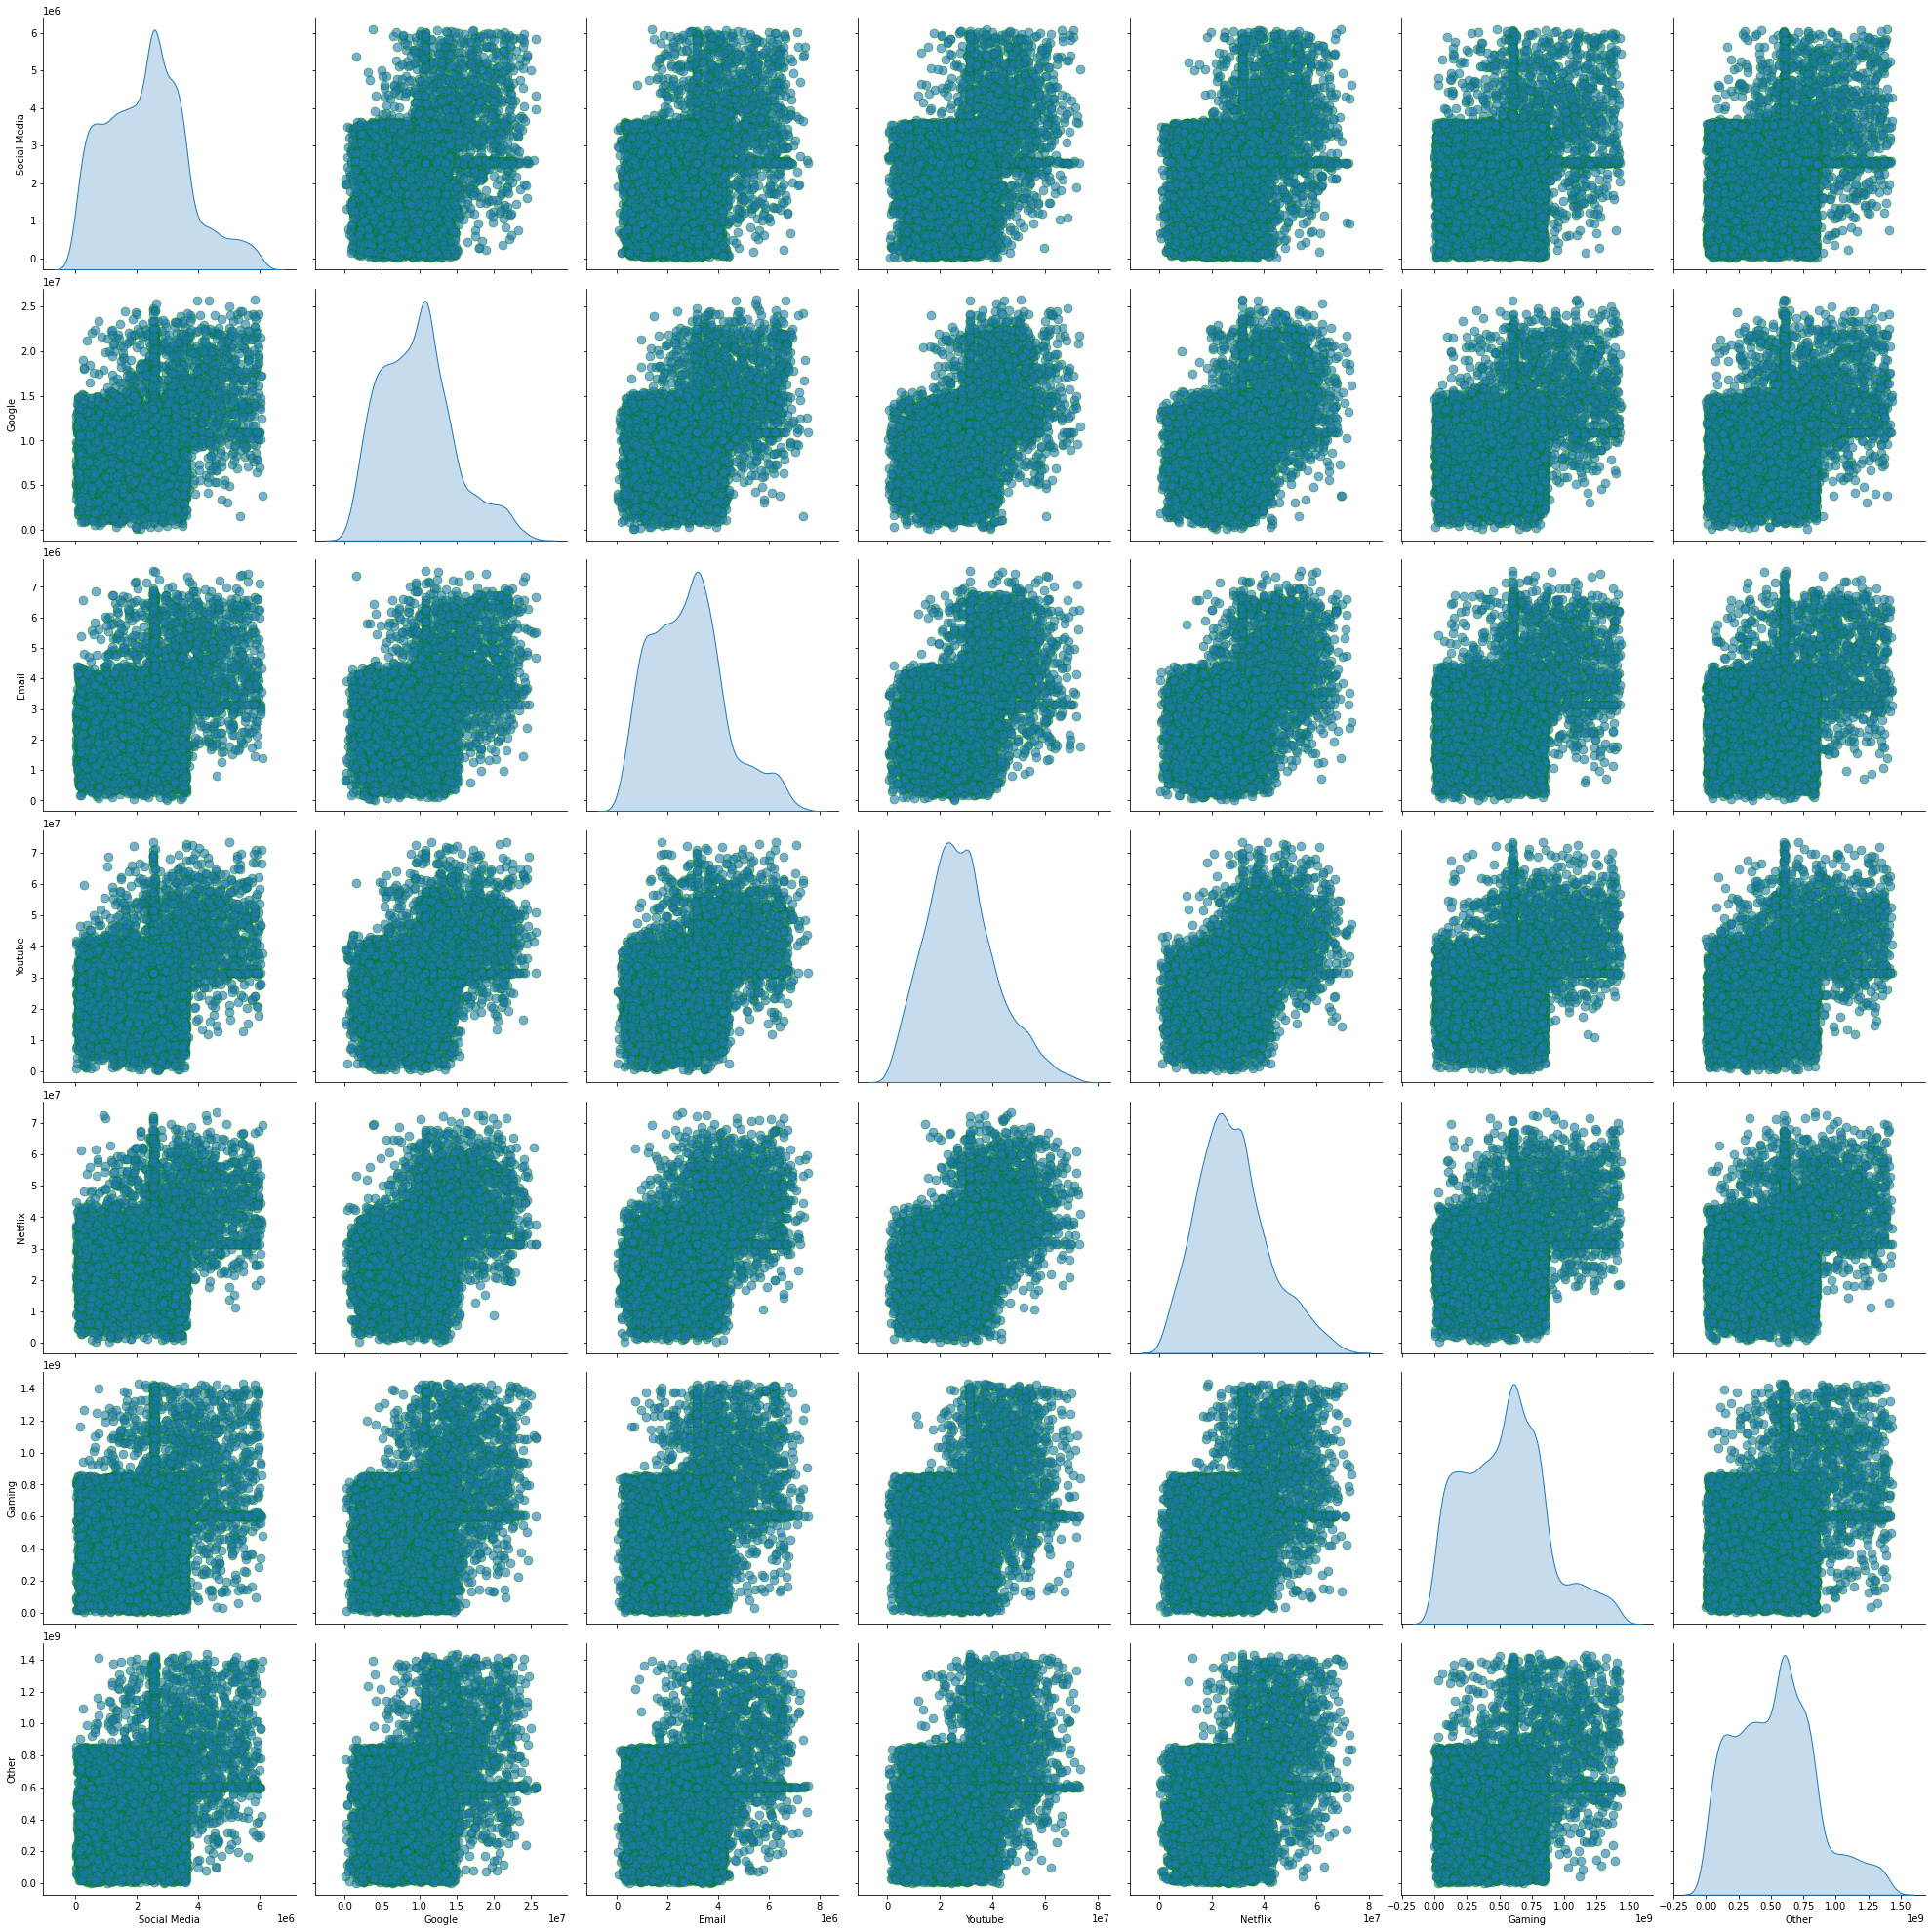

In [57]:
sns.pairplot(appdata.sample(6000), diag_kind = 'kde', 
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'g'},height=4)